In [1]:
%%time
import os
if ( not os.path.exists("./food_mnist") ):
  !git clone https://github.com/srohit0/food_mnist.git
  
import food_mnist

(x_train, y_train), (x_test, y_test) = food_mnist.load_data()
labels_dict = food_mnist.labels()

Cloning into 'food_mnist'...
remote: Enumerating objects: 5094, done.
remote: Total 5094 (delta 0), reused 0 (delta 0), pack-reused 5094
Receiving objects: 100% (5094/5094), 239.57 MiB | 44.79 MiB/s, done.
Resolving deltas: 100% (37/37), done.
Checking out files: 100% (5015/5015), done.
CPU times: user 27.8 s, sys: 769 ms, total: 28.6 s
Wall time: 38.9 s


In [2]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
import tensorflow as tf
num_classes = 10
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((3750, 224, 224, 3), (3750, 10), (1250, 224, 224, 3), (1250, 10))

In [9]:
%matplotlib inline

import os
import shutil
import random

import numpy as np
import cv2

from PIL import Image, ImageOps
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import time

In [12]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout, Conv2D, GlobalAveragePooling2D, MaxPool2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.optimizers import Adam

In [13]:
model = Sequential()
model.add(Conv2D(32, 8, activation='relu', input_shape=(x_train.shape[1:])))
model.add(Conv2D(64, 8, activation='relu'))
model.add(Conv2D(128, 8, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, 8, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 217, 217, 32)      6176      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 210, 210, 64)      131136    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 203, 203, 128)     524416    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 101, 101, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 256)       2097408   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 256)       0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)              

In [14]:
checkpointer = ModelCheckpoint('model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['acc'])

In [15]:
history = model.fit(x_train, y_train,
            validation_data = (x_test, y_test),
            
            epochs = 200,
            
            verbose = 1,
            callbacks = [checkpointer])

Epoch 1/200
118/118 [==============================] - 131s 1s/step - loss: 2.2600 - acc: 0.1299 - val_loss: 2.0471 - val_acc: 0.2544

Epoch 00001: val_acc improved from -inf to 0.25440, saving model to model.h5
Epoch 2/200
118/118 [==============================] - 121s 1s/step - loss: 2.0428 - acc: 0.2507 - val_loss: 1.9311 - val_acc: 0.3032

Epoch 00002: val_acc improved from 0.25440 to 0.30320, saving model to model.h5
Epoch 3/200
118/118 [==============================] - 121s 1s/step - loss: 2.0038 - acc: 0.2773 - val_loss: 1.8915 - val_acc: 0.3464

Epoch 00003: val_acc improved from 0.30320 to 0.34640, saving model to model.h5
Epoch 4/200
118/118 [==============================] - 122s 1s/step - loss: 1.9019 - acc: 0.3380 - val_loss: 1.8800 - val_acc: 0.3272

Epoch 00004: val_acc did not improve from 0.34640
Epoch 5/200
118/118 [==============================] - 121s 1s/step - loss: 1.9052 - acc: 0.3163 - val_loss: 1.9009 - val_acc: 0.3072

Epoch 00005: val_acc did not improve f

In [29]:
def pred (y_classes):
  if y_classes == 0:
    print("Apple Pie")
  elif y_classes == 1:
    print("Baby Back Ribs")  
  elif y_classes == 2:
    print("Baklava")   
  elif y_classes == 3:
    print("Beef Carpaccio")
  elif y_classes == 4:
    print("Beef Tartare")  
  elif y_classes == 5:
    print("Beet Salad")
  elif y_classes == 6:
    print("Beignets")
  elif y_classes == 7:
    print("Bibimbap")
  elif y_classes == 8:
    print("Bread Pudding")
  else:
    print("Breakfast Burrito")

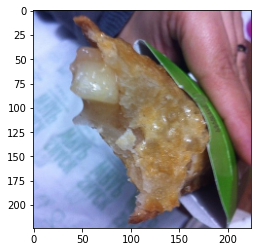

In [33]:
img = cv2.imread('/content/food_mnist/images/apple_pie/1011328.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img, (224, 224))
new_array = new_array/255

x = np.expand_dims(new_array, axis=0)
plt.imshow(new_array)

In [30]:
y = model.predict(x)
y_class = y.argmax(axis=-1)
pred(y_class)

Apple Pie


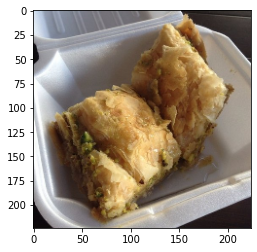

In [34]:
img = cv2.imread('/content/food_mnist/images/baklava/1021344.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img, (224, 224))
new_array = new_array/255

x = np.expand_dims(new_array, axis=0)
plt.imshow(new_array)

In [35]:
y = model.predict(x)
y_class = y.argmax(axis=-1)
pred(y_class)

Beignets


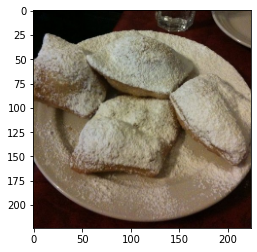

In [36]:
img = cv2.imread('/content/food_mnist/images/beignets/1002850.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img, (224, 224))
new_array = new_array/255

x = np.expand_dims(new_array, axis=0)
plt.imshow(new_array)

In [37]:
y = model.predict(x)
y_class = y.argmax(axis=-1)
pred(y_class)

Beignets


In [ ]:
!deepCC model.h5

[INFO]
Reading [keras model] 'model.h5'
[SUCCESS]
Saved 'model.onnx'
[INFO]
Reading [onnx model] 'model.onnx'
[INFO]
Model info:
  ir_vesion : 5
  doc       : 
[WARNING]
[ONNX]: terminal (input/output) conv2d_input's shape is less than 1. Changing it to 1.
[WARNING]
[ONNX]: terminal (input/output) dense_2's shape is less than 1. Changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_2) as io node.
[INFO]
Running DNNC graph sanity check ...
[SUCCESS]
Passed sanity check.
[INFO]
Writing C++ file 'model_deepC/model.cpp'
[INFO]
deepSea model files are ready in 'model_deepC/' 
[RUNNING COMMAND]
g++ -std=c++11 -O3 -fno-rtti -fno-exceptions -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 model_deepC/model.cpp -o model_deepC/model.exe
[RUNNING COMMAND]
size "model_deepC/model.exe"
   text	   data	  

In [8]:
!pip install -q efficientnet
import efficientnet.tfkeras as efn
model5b = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
model5b.summary()

16809984/16804768 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Functional) (None, 7, 7, 1280)        4049564   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 4,062,374
Trainable params: 4,020,358
Non-trainable params: 42,016
_________________________________________________________________


In [11]:
mcB0 = ModelCheckpoint('best_modelB0.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model5b.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['acc'])

history = model5b.fit(x_train, y_train,
            validation_data = (x_test, y_test),
            
            epochs = 15,
            
            verbose = 1,
            callbacks = mcB0)

Epoch 1/15
118/118 [==============================] - 53s 325ms/step - loss: 2.0842 - acc: 0.2784 - val_loss: 1.3956 - val_acc: 0.5712

Epoch 00001: val_acc improved from -inf to 0.57120, saving model to best_modelB0.h5
Epoch 2/15
118/118 [==============================] - 37s 316ms/step - loss: 0.9567 - acc: 0.7197 - val_loss: 0.7348 - val_acc: 0.7776

Epoch 00002: val_acc improved from 0.57120 to 0.77760, saving model to best_modelB0.h5
Epoch 3/15
118/118 [==============================] - 37s 311ms/step - loss: 0.5368 - acc: 0.8407 - val_loss: 0.5112 - val_acc: 0.8352

Epoch 00003: val_acc improved from 0.77760 to 0.83520, saving model to best_modelB0.h5
Epoch 4/15
118/118 [==============================] - 37s 314ms/step - loss: 0.3634 - acc: 0.8978 - val_loss: 0.4360 - val_acc: 0.8584

Epoch 00004: val_acc improved from 0.83520 to 0.85840, saving model to best_modelB0.h5
Epoch 5/15
118/118 [==============================] - 37s 312ms/step - loss: 0.2345 - acc: 0.9379 - val_loss: 0

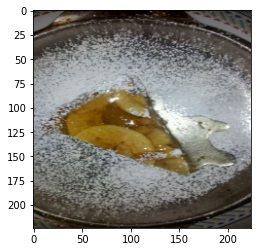

In [44]:
img = cv2.imread('/content/food_mnist/images/apple_pie/1005649.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img, (224, 224))
new_array = new_array/255

x = np.expand_dims(new_array, axis=0)
plt.imshow(new_array)

In [45]:
y = model5b.predict(x)
y_class = y.argmax(axis=-1)
pred(y_class)

Apple Pie


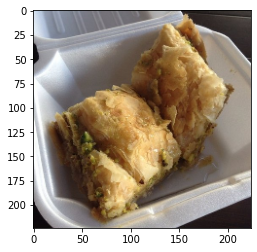

In [40]:
img = cv2.imread('/content/food_mnist/images/baklava/1021344.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img, (224, 224))
new_array = new_array/255

x = np.expand_dims(new_array, axis=0)
plt.imshow(new_array)

In [41]:
y = model5b.predict(x)
y_class = y.argmax(axis=-1)
pred(y_class)

Baklava


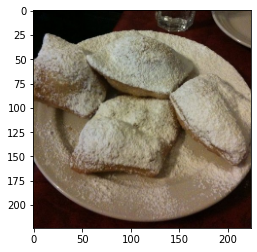

In [42]:
img = cv2.imread('/content/food_mnist/images/beignets/1002850.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img, (224, 224))
new_array = new_array/255

x = np.expand_dims(new_array, axis=0)
plt.imshow(new_array)

In [43]:
y = model5b.predict(x)
y_class = y.argmax(axis=-1)
pred(y_class)

Beignets


In [ ]:
!deepCC best_modelB0.h5